# Pytorch

În acest notebook, vom utiliza **PyTorch**, care este - împreună cu biblioteca Tensotrflow de la Google - cel mai comun framework de Deep learning. Pytorch permite dezvoltarea cu ușurință a rețelelor neuronale cu topologii flexibile, funcții de activare și pierderi și să fie antrenate folosind diverse optimizatori. La fel ca toate bibliotecile de învățare profundă, PyTorch efectuează automat *backpropagation*, astfel gradienții vor fi calculați automat.

În acest exemplu vom folosi o rețea neuronală cu un strat de intrare, un strat ascuns și un strat de ieșire, pentru următoarele aplicații:
1. detectarea punctelor din interiorul unui triunghi folosind 3 neuroni
2. detectarea punctelor din interiorul unui pătrat folosind 4 neuroni
3. detectarea punctelor din interiorul unui cerc folosind 10 neuroni

## 0. Preparation
Vom importa bibliotecile necesare (Torch, Numpy și Matplotlib)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## 1. Definirea unei Rețele Neuronale
PyTorch permite definirea unor **rețele neuronale întregi** formate din straturi, cu matrice de ponderi și vectori de bias. Putem antrena cu ușurință aceste rețele și le putem aplica pentru noi date de intrare.

Definim o rețea neuronală simplă *(mai precis, un MLP cu 2 unități de intrare, $H$ unități ascunse și o unitate de ieșire)*.

Implementarea introduce alte două tipuri de structuri din PyTorch:
* **Modul**: Această clasă reprezintă o rețea neuronală. Ori de câte ori veți defini propria rețea, aceasta va utiliza clasa Module.
* **Parametru** : Parametrii sunt părțile modelului care sunt *învățate*. Exemple clasice de astfel de parametri sunt matrice de greutate și bias într-un MLP.

In [ ]:
class MLP(nn.Module):
    def __init__(self, H):
        '''H is the number of hidden units.'''
        super(MLP, self).__init__()
        self.W2 = nn.Parameter(torch.randn((2, H), dtype=torch.float))
        self.W3 = nn.Parameter(torch.randn((H, 1), dtype=torch.float))
        self.b2 = nn.Parameter(torch.randn(H))
        self.b3 = nn.Parameter(torch.randn(1))

    def forward(self, x):
        # Layer 2
        x = torch.mm(x, self.W2) + self.b2
        x = torch.sigmoid(x)

        # Layer 3
        x = torch.mm(x, self.W3) + self.b3
        x = torch.sigmoid(x)

        return x

Metoda *visualize* are rolul de a afișa grafic rezultatele unei rețele neuronale pentru clasificarea punctelor în funcție de etichetele adevărate și cele prezise de model.



In [ ]:
# Functie de afișare a datelor
def visualize(data, labels, model):
    with torch.no_grad():
        preds = model(data).squeeze().round()
    plt.scatter(data[:, 0], data[:, 1], c=preds, cmap='coolwarm', alpha=0.5)
    plt.show()

## 2. Detectarea punctelor din interiorul unui triunghi

Funcția *generate_triangle_data* este folosită pentru a genera un set de puncte aleatorii în planul 2D și pentru a le eticheta în funcție de apartenența acestora la interiorul unui triunghi. Triunghiul este definit de vârfurile (0,0), (1,0) și (0,1), iar interiorul său este regiunea unde x și y îndeplinesc condițiile:
*   0<𝑥<1
*   0<𝑦<1−x

In [ ]:
def generate_triangle_data(n_points=10000):
    points = np.random.uniform(-1, 1, (n_points, 2))
    labels = np.array([
        1 if (0 < x < 1) and (0 < y < 1 - x) else 0 for x, y in points
    ])
    return torch.tensor(points, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

Metoda *train_triangle_net* antrenează un model de rețea neuronală pentru a clasifica punctele în interiorul și în afara unui triunghi. Aceasta utilizează datele generate de *generate_triangle_data*, antrenând rețeaua pentru un număr de 5000 de epoci cu ajutorul funcției de pierdere BCELoss și a optimizatorului Adam. La finalul antrenării, metoda vizualizează rezultatele predicțiilor rețelei folosind funcția visualize.

In [ ]:
def train_triangle_net():
    data, labels = generate_triangle_data(n_points=10000)
    net = MLP(H=3)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = net(data).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print intermediate results for monitoring
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    print(f"Final loss: {loss.item()}")
    visualize(data, labels, net)

Training Triangle Network...
Epoch 0, Loss: 0.5657935738563538
Epoch 100, Loss: 0.33450931310653687
Epoch 200, Loss: 0.31056109070777893
Epoch 300, Loss: 0.2932382822036743
Epoch 400, Loss: 0.28364652395248413
Epoch 500, Loss: 0.27668604254722595
Epoch 600, Loss: 0.2688564360141754
Epoch 700, Loss: 0.2597593665122986
Epoch 800, Loss: 0.2504940330982208
Epoch 900, Loss: 0.24159814417362213
Epoch 1000, Loss: 0.2336280792951584
Epoch 1100, Loss: 0.22673852741718292
Epoch 1200, Loss: 0.22009281814098358
Epoch 1300, Loss: 0.20816709101200104
Epoch 1400, Loss: 0.18075396120548248
Epoch 1500, Loss: 0.15005739033222198
Epoch 1600, Loss: 0.1260315477848053
Epoch 1700, Loss: 0.10812550038099289
Epoch 1800, Loss: 0.09448802471160889
Epoch 1900, Loss: 0.08380132913589478
Epoch 2000, Loss: 0.0752173438668251
Epoch 2100, Loss: 0.06817925721406937
Epoch 2200, Loss: 0.062308166176080704
Epoch 2300, Loss: 0.05733783543109894
Epoch 2400, Loss: 0.05307618901133537
Epoch 2500, Loss: 0.049381501972675323
E

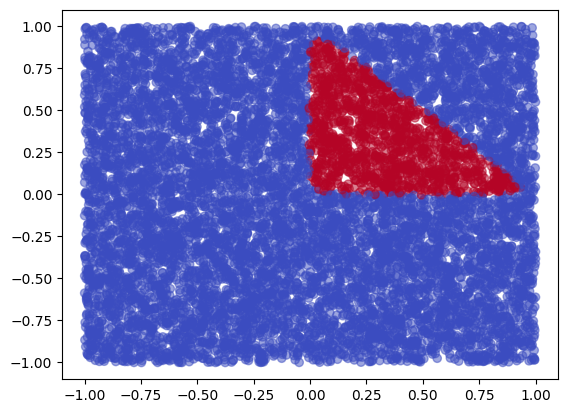

In [ ]:
print("Training Triangle Network...")
train_triangle_net()

## 3. Detectarea punctelor din interiorul unui pătrat

Funcția *generate_square_data* generează puncte aleatorii într-un pătrat centrat în origine, cu latura de lungime 1, având coordonatele în intervalul [-1, 1] pe ambele axe. Fiecare punct este etichetat ca fiind în interiorul pătratului (eticheta 1) dacă se află în intervalul -0.5 < x < 0.5 și -0.5 < y < 0.5, iar în afara pătratului (eticheta 0) în caz contrar. Punctele și etichetele sunt returnate sub formă de tensori PyTorch pentru a fi utilizate în antrenarea rețelei neuronale.

In [ ]:
def generate_square_data(n_points=10000):
    points = np.random.uniform(-1, 1, (n_points, 2))
    labels = np.array([
        1 if (-0.5 < x < 0.5) and (-0.5 < y < 0.5) else 0 for x, y in points
    ])
    return torch.tensor(points, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

Metoda *train_square_net* antrenează o rețea neuronală pentru a clasifica punctele în interiorul și în afara unui pătrat. Aceasta utilizează datele generate de *generate_square_data*, antrenând rețeaua pentru 5000 de epoci cu ajutorul funcției de pierdere BCELoss și a optimizatorului Adam. La finalul antrenării, metoda vizualizează rezultatele predicțiilor rețelei folosind funcția visualize.

In [ ]:
def train_square_net():
    data, labels = generate_square_data()
    net = MLP(H=4)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = net(data).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print intermediate results for monitoring
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    print(f"Final loss: {loss.item()}")
    visualize(data, labels, net)

Training Square Network...
Epoch 0, Loss: 2.31374454498291
Epoch 100, Loss: 0.7931297421455383
Epoch 200, Loss: 0.5730205774307251
Epoch 300, Loss: 0.5577578544616699
Epoch 400, Loss: 0.5570460557937622
Epoch 500, Loss: 0.5564500689506531
Epoch 600, Loss: 0.5530237555503845
Epoch 700, Loss: 0.5485996603965759
Epoch 800, Loss: 0.5433880686759949
Epoch 900, Loss: 0.535191535949707
Epoch 1000, Loss: 0.5207281708717346
Epoch 1100, Loss: 0.49758100509643555
Epoch 1200, Loss: 0.4647369980812073
Epoch 1300, Loss: 0.4324617087841034
Epoch 1400, Loss: 0.40086010098457336
Epoch 1500, Loss: 0.36625897884368896
Epoch 1600, Loss: 0.3322540819644928
Epoch 1700, Loss: 0.30234360694885254
Epoch 1800, Loss: 0.27727997303009033
Epoch 1900, Loss: 0.2567734718322754
Epoch 2000, Loss: 0.24006591737270355
Epoch 2100, Loss: 0.2261391580104828
Epoch 2200, Loss: 0.21377506852149963
Epoch 2300, Loss: 0.2022922933101654
Epoch 2400, Loss: 0.19242629408836365
Epoch 2500, Loss: 0.18434567749500275
Epoch 2600, Loss:

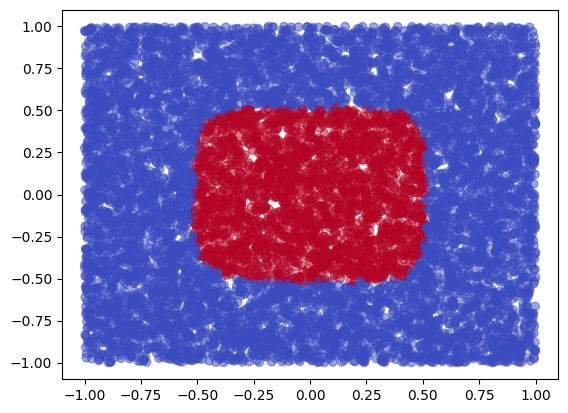

In [ ]:
print("Training Square Network...")
train_square_net()

## 4. Detectarea punctelor din interiorul unui cerc

Funcția *generate_circle_data* generează puncte aleatorii într-un pătrat cu laturile de lungime 2, având coordonatele în intervalul [-1, 1] pe ambele axe, și le etichetează în funcție de apartenența acestora la interiorul unui cerc cu raza 0.5, centrat în origine. Punctele care se află în interiorul cercului (unde distanța față de origine este mai mică de 0.5) primesc eticheta 1, iar cele din afară primesc eticheta 0. Punctele și etichetele sunt returnate sub formă de tensori PyTorch pentru a fi folosite în antrenarea rețelei neuronale.

In [ ]:
def generate_circle_data(n_points=10000):
    points = np.random.uniform(-1, 1, (n_points, 2))
    labels = np.array([
        1 if np.sqrt(x**2 + y**2) < 0.5 else 0 for x, y in points
    ])
    return torch.tensor(points, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

Metoda *train_circle_net* antrenează o rețea neuronală pentru a clasifica punctele în interiorul și în afara unui cerc. Aceasta folosește datele generate de *generate_circle_data*, antrenând rețeaua pentru 5000 de epoci cu funcția de pierdere BCELoss și optimizatorul Adam. La final, metoda vizualizează rezultatele predicțiilor rețelei folosind funcția visualize.

In [ ]:
def train_circle_net():
    data, labels = generate_circle_data()
    net = MLP(H=10)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)

    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = net(data).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print intermediate results for monitoring
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    print(f"Final loss: {loss.item()}")
    visualize(data, labels, net)

Training Circle Network...
Epoch 0, Loss: 1.1400281190872192
Epoch 100, Loss: 0.4891710877418518
Epoch 200, Loss: 0.47559037804603577
Epoch 300, Loss: 0.4451756775379181
Epoch 400, Loss: 0.39974233508110046
Epoch 500, Loss: 0.34216058254241943
Epoch 600, Loss: 0.2813490927219391
Epoch 700, Loss: 0.23061434924602509
Epoch 800, Loss: 0.19261807203292847
Epoch 900, Loss: 0.16487881541252136
Epoch 1000, Loss: 0.14406508207321167
Epoch 1100, Loss: 0.1278691440820694
Epoch 1200, Loss: 0.11505207419395447
Epoch 1300, Loss: 0.10457771271467209
Epoch 1400, Loss: 0.09564527869224548
Epoch 1500, Loss: 0.08797631412744522
Epoch 1600, Loss: 0.08140194416046143
Epoch 1700, Loss: 0.07563887536525726
Epoch 1800, Loss: 0.07051991671323776
Epoch 1900, Loss: 0.06595158576965332
Epoch 2000, Loss: 0.06184147298336029
Epoch 2100, Loss: 0.058132629841566086
Epoch 2200, Loss: 0.05480961129069328
Epoch 2300, Loss: 0.05185403302311897
Epoch 2400, Loss: 0.04922577738761902
Epoch 2500, Loss: 0.046872030943632126


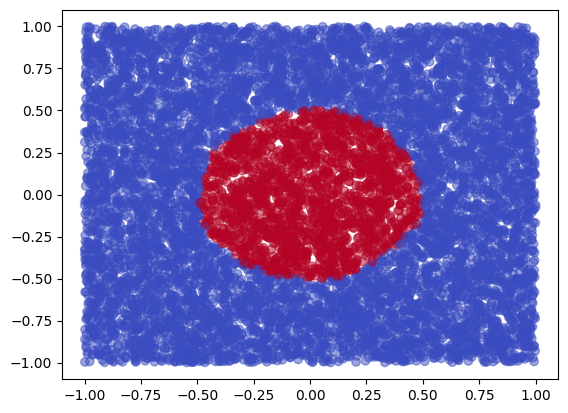

In [ ]:
print("Training Circle Network...")
train_circle_net()